In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
C = pd.read_csv("Customers.csv")
P = pd.read_csv("Products.csv")
T = pd.read_csv("Transactions.csv")

In [3]:
C.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
P.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
T.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [6]:
df_2 = T.merge(P, on="ProductID", how="left")
df_2.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [7]:
df_1 = T.merge(C, on = "CustomerID")
df_1.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


In [8]:
# total spending per customer

In [9]:
customer_value = df_1.groupby(["CustomerID", "Region"])["TotalValue"].sum().reset_index()
customer_value = customer_value.sort_values(by="TotalValue", ascending=False)
customer_value.head()  # Top 5 most valuable customers

,CustomerID,Region,TotalValue
140,C0141,Europe,10673.87
53,C0054,Asia,8040.39
64,C0065,North America,7663.70
155,C0156,North America,7634.45
81,C0082,South America,7572.91


In [83]:
region_spending = df_1.groupby("Region")["TotalValue"].sum().reset_index()
region_spending = region_spending.sort_values(by="TotalValue", ascending=False)

region_spending

,Region,TotalValue
3,South America,219352.56
1,Europe,166254.63
2,North America,152313.40
0,Asia,152074.97


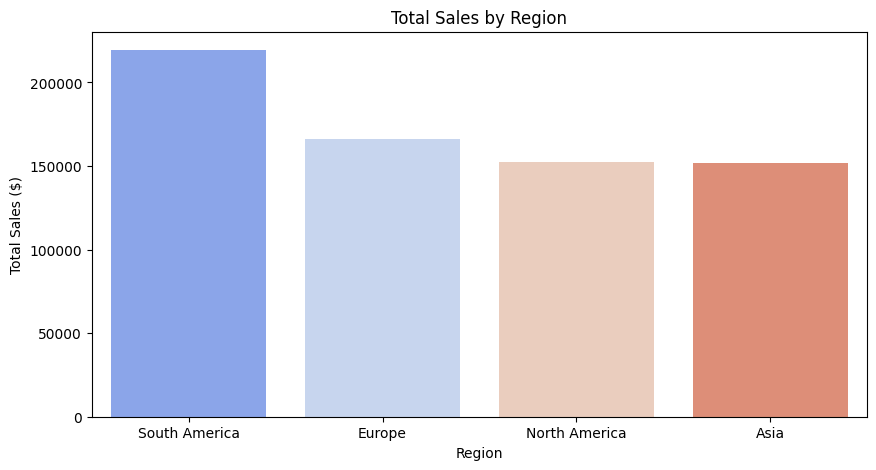

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x="Region", y="TotalValue", data=region_spending, palette="coolwarm", hue = "Region")
plt.xlabel("Region")
plt.ylabel("Total Sales ($)")
plt.title("Total Sales by Region")
plt.show()

In [12]:
## number of customers in that particular region

In [13]:
customer_count = C.groupby("Region")["CustomerID"].nunique().reset_index()
customer_count.sort_values(by = "CustomerID", ascending = False)

,Region,CustomerID
3,South America,59
1,Europe,50
2,North America,46
0,Asia,45


In [14]:
# which product performed well

In [15]:
df_2

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 8:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 2:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics,459.86


In [16]:
df_2['TransactionID'].is_unique

True

In [17]:
num_cat = df_2.groupby("Category")["ProductID"].nunique().reset_index()
num_cat.rename(columns = {"ProductID": "Product count"}, inplace = True)
num_cat

,Category,Product count
0,Books,26
1,Clothing,25
2,Electronics,26
3,Home Decor,23


In [18]:
## on the basis of total revenue which one was more profitable 

In [19]:
T.groupby("ProductID")["Price"].nunique() 

ProductID
P001    1
P002    1
P003    1
P004    1
P005    1
       ..
P096    1
P097    1
P098    1
P099    1
P100    1
Name: Price, Length: 100, dtype: int64

In [20]:
product_performance = T.groupby("ProductID").agg(
    TotalRevenue=("TotalValue", "sum"),
    TotalQuantity=("Quantity", "sum"),
    product_price=("Price", "first")  # Assuming cost price per unit is available
).reset_index()

product_performance["TotalCost"] = product_performance["product_price"] * product_performance["TotalQuantity"]
product_performance["TotalProfit"] = product_performance["TotalRevenue"] - product_performance["TotalCost"]
product_performance["ProfitMargin (%)"] = (product_performance["TotalProfit"] / product_performance["TotalRevenue"]) * 100

product_performance = product_performance.sort_values(by="TotalProfit", ascending=False)
product_performance

,ProductID,TotalRevenue,TotalQuantity,product_price,TotalCost,TotalProfit,ProfitMargin (%)
93,P094,12078.18,27,447.34,12078.18,1.818989e-12,1.506013e-14
49,P050,12254.20,28,437.65,12254.20,1.818989e-12,1.484380e-14
9,P010,8052.99,23,350.13,8052.99,9.094947e-13,1.129388e-14
10,P011,7574.80,29,261.20,7574.80,9.094947e-13,1.200685e-14
92,P093,5183.98,17,304.94,5183.98,9.094947e-13,1.754433e-14
...,...,...,...,...,...,...,...
46,P047,4301.91,27,159.33,4301.91,-9.094947e-13,-2.114165e-14
60,P061,6749.28,43,156.96,6749.28,-9.094947e-13,-1.347543e-14
75,P076,11161.54,26,429.29,11161.54,-1.818989e-12,-1.629694e-14
84,P085,9576.05,23,416.35,9576.05,-1.818989e-12,-1.899520e-14


In [21]:
## popularity of particular product 

In [22]:
product_transactions = T["ProductID"].value_counts().reset_index()
product_transactions.columns = ["ProductID", "TransactionCount"]
product_transactions.head()

,ProductID,TransactionCount
0,P059,19
1,P029,17
2,P054,16
3,P061,16
4,P062,16


In [23]:
PT = product_transactions.merge(P, on = "ProductID")
PT.drop(columns=["Price"], inplace=False)

,ProductID,TransactionCount,ProductName,Category
0,P059,19,SoundWave Jeans,Clothing
1,P029,17,TechPro Headphones,Electronics
2,P054,16,SoundWave Cookbook,Books
3,P061,16,HomeSense Desk Lamp,Home Decor
4,P062,16,HomeSense Novel,Books
...,...,...,...,...
95,P052,5,SoundWave Jacket,Clothing
96,P031,4,SoundWave Headphones,Electronics
97,P044,4,ActiveWear Running Shoes,Clothing
98,P014,4,ActiveWear Jacket,Clothing


In [24]:
product_quantity = T.groupby("ProductID")["Quantity"].sum().reset_index()
product_quantity = product_quantity.sort_values(by="Quantity", ascending=False)
product_quantity

,ProductID,Quantity
53,P054,46
58,P059,46
28,P029,45
47,P048,43
56,P057,43
...,...,...
43,P044,13
59,P060,13
23,P024,12
98,P099,11


In [25]:
PQ = product_quantity.merge(P, on = "ProductID")
PQ.drop(columns=["Price"], inplace=False)

,ProductID,Quantity,ProductName,Category
0,P054,46,SoundWave Cookbook,Books
1,P059,46,SoundWave Jeans,Clothing
2,P029,45,TechPro Headphones,Electronics
3,P048,43,TechPro Cookbook,Books
4,P057,43,ActiveWear Smartphone,Electronics
...,...,...,...,...
95,P044,13,ActiveWear Running Shoes,Clothing
96,P060,13,HomeSense T-Shirt,Clothing
97,P024,12,SoundWave Cookbook,Books
98,P099,11,SoundWave Mystery Book,Books


In [26]:
#seasonal trends

In [27]:
#converting to date and time //    (to_datetime)

In [30]:
T.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 7:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [33]:
T["Year"] = T["TransactionDate"].dt.year
T["Month"] = T["TransactionDate"].dt.month
T["Quarter"] = T["TransactionDate"].dt.quarter
T["DayOfWeek"] = T["TransactionDate"].dt.day_name()

In [36]:
T

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,Year,Month,Quarter,DayOfWeek
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024,8,3,Sunday
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024,5,2,Monday
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024,4,2,Thursday
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024,3,1,Tuesday
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024,3,1,Thursday
...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,2024,10,4,Thursday
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,2024,6,2,Tuesday
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,2024,4,2,Friday
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,2024,9,3,Sunday


In [ ]:
## monthly sales trend

In [42]:
monthly_sales = T.groupby("Month")["TotalValue"].sum().reset_index()
monthly_sales

,Month,TotalValue
0,1,66376.39
1,2,51459.27
2,3,47828.73
3,4,57519.06
4,5,64527.74
5,6,48771.18
6,7,71366.39
7,8,63436.74
8,9,70603.75
9,10,47063.22


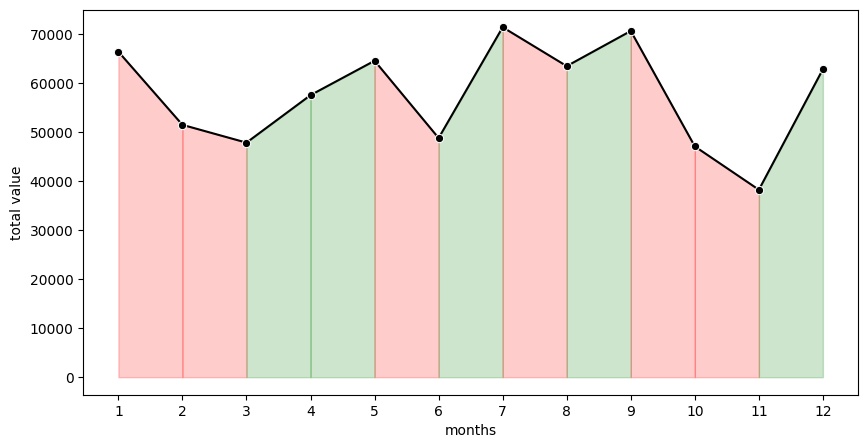

In [85]:
x = monthly_sales["Month"]
y = monthly_sales["TotalValue"]

colors = np.where(y.diff() > 0, "green", "red") 



plt.figure(figsize = (10,5))
for i in range(1, len(x)):  # Loop to fill color between months
    plt.fill_between([x[i-1], x[i]], [y[i-1], y[i]], color=colors[i], alpha=0.2)
sns.lineplot(data = monthly_sales, x= "Month", y= "TotalValue", marker="o", color = "black")
plt.xticks(range(1,13))
plt.ylabel("total value")
plt.xlabel("months")
plt.show()

In [60]:
## quaterly trends

In [62]:
quarterly_sales = T.groupby("Quarter")["TotalValue"].sum().reset_index()
quarterly_sales

,Quarter,TotalValue
0,1,165664.39
1,2,170817.98
2,3,205406.88
3,4,148106.31


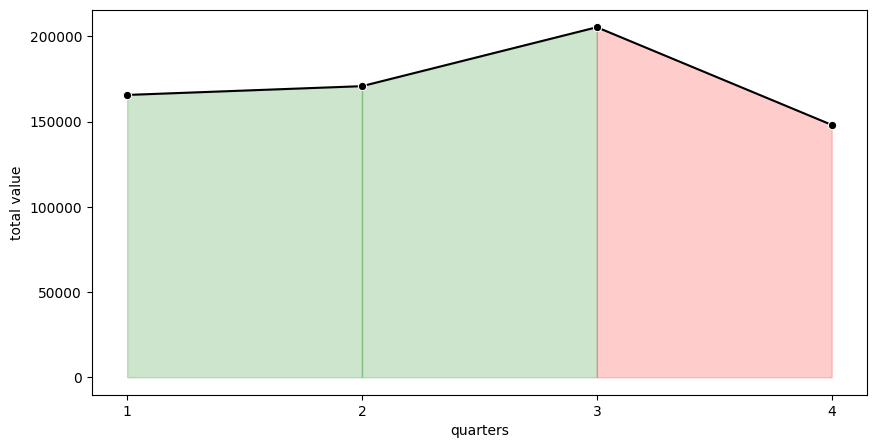

In [67]:
x = quarterly_sales["Quarter"]
y = quarterly_sales["TotalValue"]

colors = np.where(y.diff() > 0, "green", "red") 



plt.figure(figsize = (10,5))
for i in range(1, len(x)):  # Loop to fill color between months
    plt.fill_between([x[i-1], x[i]], [y[i-1], y[i]], color=colors[i], alpha=0.2)
sns.lineplot(data = quarterly_sales, x = "Quarter", y = "TotalValue" , marker="o", color = "black")
plt.xticks(range(1,5))
plt.ylabel("total value")
plt.xlabel("quarters")
plt.show()

In [68]:
## day of the week

In [75]:
daywise_sales = T.groupby("DayOfWeek")["TotalValue"].sum().reset_index()
daywise_sales

,DayOfWeek,TotalValue
0,Friday,87032.09
1,Monday,101984.33
2,Saturday,81399.74
3,Sunday,92605.93
4,Thursday,99202.71
5,Tuesday,108567.61
6,Wednesday,119203.15


In [81]:
correct_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Convert DayOfWeek to categorical (this ensures correct order in plots)
daywise_sales["DayOfWeek"] = pd.Categorical(daywise_sales["DayOfWeek"], categories=correct_order, ordered=True)
daywise_sales

,DayOfWeek,TotalValue
1,Monday,101984.33
5,Tuesday,108567.61
6,Wednesday,119203.15
4,Thursday,99202.71
0,Friday,87032.09
2,Saturday,81399.74
3,Sunday,92605.93


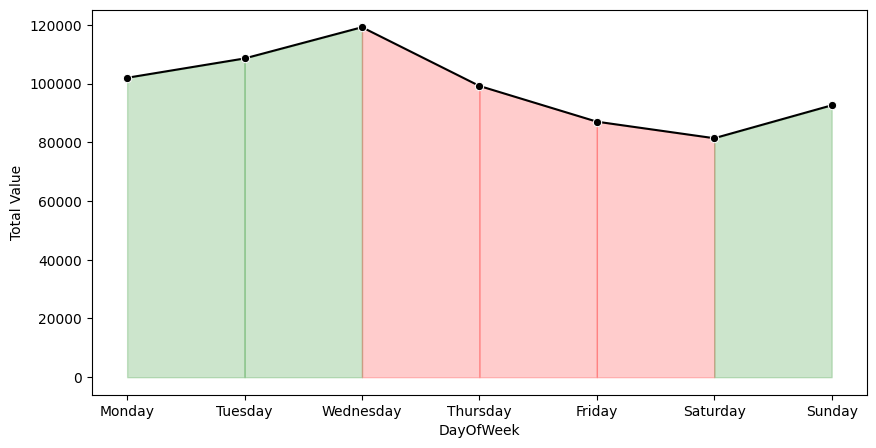

In [82]:
x = daywise_sales["DayOfWeek"]
y = daywise_sales["TotalValue"]
colors = np.where(y.diff() > 0, "green", "red")

plt.figure(figsize=(10,5))
for i in range(1, len(x)):  
    plt.fill_between([x.iloc[i-1], x.iloc[i]], [y.iloc[i-1], y.iloc[i]], color=colors[i], alpha=0.2)

sns.lineplot(data=daywise_sales, x="DayOfWeek", y="TotalValue", marker="o", color="black")
plt.xlabel("DayOfWeek")
plt.ylabel("Total Value")
plt.show()